In [ ]:
#Micaela Landauro
#PHYS 4392.001 Spring 2023 UTD

In [31]:
from astropy.table import Table
import matplotlib
from pytransit import QuadraticModel
from pytransit import UniformModel
import matplotlib.pyplot as plt
import numpy as np

In [22]:
#read in time and flux from kepler archive data
t = Table.read('kplrdata.fits', format='fits')
time = t['TIME'].data
flux = t['PDCSAP_FLUX'].data

#find medium flux to normalize archive data
median_flux = flux
median_flux = flux[~np.isnan(t['PDCSAP_FLUX'].data)]
#new normalized flux
flux = flux/np.median(median_flux)

In [23]:
#create quadratic model
tm = QuadraticModel()
tm.set_data(time)

In [24]:
#parameters
#from Wong et al. 2016
k = 0.07809 #radius ratio
p = 2.20473539167 #orbital period (days)
a = 4.83 #orbital semi-major axis (au)
i = 1.434 #orbital inclination (radians)
e = 0.0016 #orbital eccenctricity
w = 2.88 #argument of periastron (radians)
#from Esteves et. al 2015
u1 = 0.3497 - 0.0035 #+ 0.0026 
u2 = 0.1741 - 0.0044 #+ 0.0057 
ldc = [u1, u2] #limb darkening coefficients for quadratic model
#from Battley et. al 2021
t0 = 121.357462 #zero epoch (BJD)

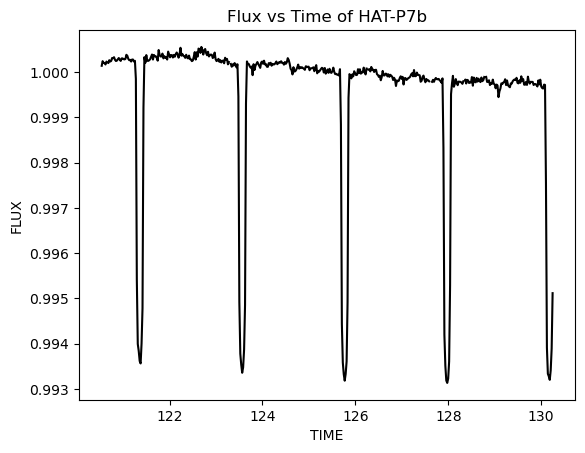

In [33]:
#archive data
plt.plot(time, flux, color = "black")
plt.xlabel('TIME')
plt.ylabel('FLUX')
plt.title('Flux vs Time of HAT-P7b')
#plt.savefig("ArchiveCurve.png", transparent=True)
plt.show()

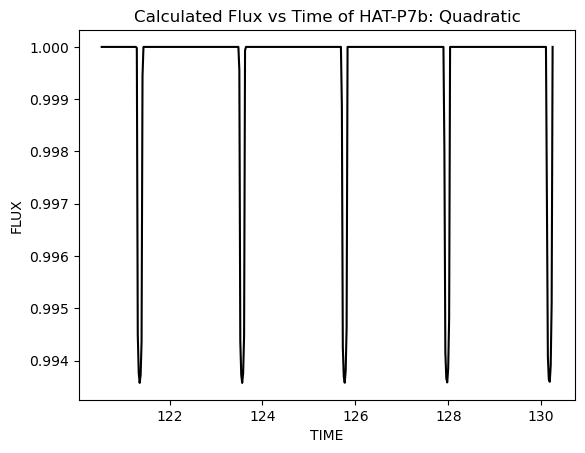

In [34]:
#using parameters
calculated_flux = tm.evaluate(k,ldc,t0,p,a,i, e, w)
plt.plot(time, calculated_flux, color="black")
plt.xlabel('TIME')
plt.ylabel('FLUX')
plt.title('Calculated Flux vs Time of HAT-P7b: Quadratic')
#plt.savefig("ParameterCurve.png", transparent=True)
plt.show()

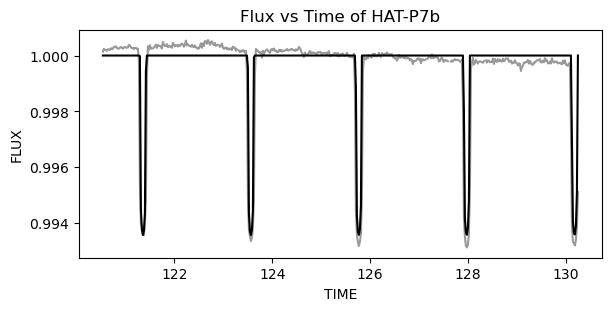

In [35]:
#both overlayed
fig, axs = plt.subplots(1, 1, figsize = (6,3), constrained_layout=True, sharey=True)
axs.plot(tm.time, flux, 'k', alpha=0.4)
axs.set_title('Flux vs Time of HAT-P7b')
axs.plot(tm.time, calculated_flux, 'k')
plt.xlabel('TIME')
plt.ylabel('FLUX')
#plt.savefig("OverlayCurve.png", transparent=True)
plt.show()